Present dataset was used to predict flight price based on differnt attributes

In [303]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [236]:
train_data=pd.read_excel(r"C:\Users\a\Documents\PROJECTS----\DT - Project\Flight_Data_Train.xlsx")

In [238]:
train_data.shape

(10683, 11)

In [240]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [241]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [242]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Null values were seen

In [369]:
train_data.dropna(inplace=True)

Null values were dropped

# Preprocessing the data

In [245]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey).dt.day

In [246]:
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey).dt.month

Date of journey column  was first converted into date-time and then was split into day and month seperately

In [247]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [248]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [249]:
#similarly Departure time was also processed
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour

In [250]:
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

Departure time was also similarly converted to date-time and then split into minute and hour

In [251]:
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [252]:
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [253]:
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [254]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

Arrival time was also similarly converted to date-time and then split into minute and hour

In [255]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [256]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

Additional info column had maximum null values so will be dropped

In [257]:
train_data.drop(['Additional_Info'],axis=1,inplace=True)

In [258]:
#total stops were replaced by the number only
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [259]:
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4 },inplace=True)

In [260]:
#one hot encoding
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [261]:
Airline=train_data[['Airline']]

In [262]:
Airline=pd.get_dummies(Airline,drop_first=True)

categorical column'Airline was converted into numerical by one hot encoding since it was nominal data.

In [263]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [264]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [265]:
Source=train_data[['Source']]

In [266]:
Source=pd.get_dummies(Source,drop_first=True)

categorical column'source' was converted into numerical by one hot encoding since it was nominal data

In [267]:
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [268]:
Destination=train_data[['Destination']]

In [269]:
Destination=pd.get_dummies(Destination,drop_first=True)

Similarly destination column was also transformedby one hot encoding

In [270]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15


In [275]:
#'Duration' column had to be split as it had extra h and m in it.
train_data['duration_hour']=train_data['Duration'].str.split('h').str.get(0)

Duration was split at h position to get duration_hour seperately

In [276]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15,7


In [277]:
train_data['duration_min']=train_data['Duration'].str.split('h').str.get(1)

similarly.to get duration_minute, the column was split

In [278]:
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,24,3,22,20,1,10,2,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,5,1,5,50,13,15,7,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,13882,6,9,9,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,6218,5,12,18,5,23,30,5,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,13302,3,1,16,50,21,35,4,45m


In [281]:
train_data['duration_min'].head(10)

0     50m
1     25m
2        
3     25m
4     45m
5     25m
6     30m
7      5m
8     30m
9     50m
Name: duration_min, dtype: object

Some empty space indicating 0 minutes was seen which will be replaced by '0' later

In [282]:
train_data['duration_min'] = train_data['duration_min'].str.replace(r'\D', '')


The unwanted'm' was trimmed from the duration_min column

In [283]:
train_data['duration_min'].head()

0    50
1    25
2      
3    25
4    45
Name: duration_min, dtype: object

In [285]:
train_data['duration_hour'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
42       2
47       2
39       2
5m       1
41       1
40       1
Name: duration_hour, dtype: int64

In [286]:
train_data=train_data[train_data['duration_hour']!='5m']

One of the row had 5m as value which was excluded

In [287]:
train_data['duration_hour'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
42       2
47       2
39       2
41       1
40       1
Name: duration_hour, dtype: int64

In [288]:
train_data['duration_hour'].dtypes

dtype('O')

In [289]:
train_data['duration_hour']=train_data['duration_hour'].astype(int)

The dtype was changed to int

In [290]:
train_data['duration_hour'].dtypes

dtype('int32')

In [291]:
train_data['duration_min'].value_counts()

30    1446
      1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     636
5      623
10     525
Name: duration_min, dtype: int64

In [292]:
train_data['duration_min'] = train_data['duration_min'].replace("", 0)

The empty space in minutes were replaced by 0

In [293]:
train_data['duration_min'].value_counts()

30    1446
0     1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     636
5      623
10     525
Name: duration_min, dtype: int64

In [294]:
train_data['duration_min']=train_data['duration_min'].astype(int)

In [296]:
#All the columns were concatenated
data_train=pd.concat([train_data,Destination,Source,Airline],axis=1)

In [298]:
data_train.drop(['Airline','Source','Destination','Route'],axis=1, inplace=True)

Unnecessary column were dropped

In [300]:
data_train.drop('Duration',axis=1, inplace=True)

In [301]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0,...,0,1,0,0,0,0,0,0,0,0
1,2.0,7662.0,5.0,1.0,5.0,50.0,13.0,15.0,7.0,25.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,13882.0,6.0,9.0,9.0,25.0,4.0,25.0,19.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,6218.0,5.0,12.0,18.0,5.0,23.0,30.0,5.0,25.0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,13302.0,3.0,1.0,16.0,50.0,21.0,35.0,4.0,45.0,...,0,1,0,0,0,0,0,0,0,0


# Similar preprocessing was done with Test_data.

In [302]:
test_data=pd.read_excel(r"C:\Users\a\Documents\PROJECTS----\DT - Project\Flight_Data_Test.xlsx")

In [304]:
test_data.shape

(2671, 10)

In [305]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [307]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [308]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [309]:
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey).dt.day

In [310]:
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey).dt.month

In [312]:
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [313]:
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour

In [314]:
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute

In [315]:
test_data.drop(['Dep_Time'],axis=1,inplace=True)

In [316]:
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour

In [317]:
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute

In [318]:
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [319]:
test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20


In [320]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [321]:
test_data.drop(['Additional_Info'],axis=1,inplace=True)

In [322]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [323]:
test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4 },inplace=True)

In [324]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [327]:
Airline=test_data[['Airline']]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [328]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [329]:


Source=test_data[['Source']]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [331]:
Destination=test_data[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [332]:
test_data['duration_hour']=test_data['Duration'].str.split('h').str.get(0)

In [333]:

test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,6,6,17,30,4,25,10
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,5,12,6,20,10,20,4


In [334]:

test_data['duration_min']=test_data['Duration'].str.split('h').str.get(1)

In [335]:
test_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,6,6,17,30,4,25,10,55m
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,5,12,6,20,10,20,4,
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,21,5,19,15,19,0,23,45m
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,21,5,8,0,21,0,13,
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,24,6,23,55,2,45,2,50m


In [336]:
test_data['duration_min'].isnull().sum()

1

In [337]:


test_data['duration_hour'].dtypes

dtype('O')

In [338]:

test_data['duration_min'].head(10)

0     55m
1        
2     45m
3        
4     50m
5     20m
6      5m
7     15m
8     45m
9      5m
Name: duration_min, dtype: object

In [339]:

test_data['duration_min'] = test_data['duration_min'].str.replace(r'\D', '')

In [340]:

test_data['duration_min'].head()

0    55
1      
2    45
3      
4    50
Name: duration_min, dtype: object

In [341]:
test_data['duration_hour'].value_counts()

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
20     41
21     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
40      1
39      1
5m      1
34      1
Name: duration_hour, dtype: int64

In [345]:
test_data=test_data[test_data['duration_hour']!='5m']

In [346]:
test_data['duration_hour']=test_data['duration_hour'].astype(int)

In [347]:
train_data['duration_hour'].dtypes

dtype('int32')

In [348]:
test_data['duration_min'].value_counts()

30    372
20    263
45    258
      253
50    233
15    232
55    211
35    210
25    206
40    166
5     144
10    122
Name: duration_min, dtype: int64

In [349]:
test_data['duration_min'] = test_data['duration_min'].replace("", 0)

In [350]:

test_data['duration_min'].value_counts()

30    372
20    263
45    258
0     253
50    233
15    232
55    211
35    210
25    206
40    166
5     144
10    122
Name: duration_min, dtype: int64

In [351]:

test_data['duration_min']=test_data['duration_min'].astype(int)

In [352]:
data_test=pd.concat([test_data,Destination,Source,Airline],axis=1)

In [353]:

data_test.drop(['Airline','Source','Destination','Route'],axis=1, inplace=True)

In [354]:

data_test.drop('Duration',axis=1, inplace=True)

data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_hour,duration_min,Destination_Cochin,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,1,...,0,0,0,1,0,0,0,0,0,0
1,1.0,5.0,12.0,6.0,20.0,10.0,20.0,4.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,1,...,0,0,0,1,0,0,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,0


In [355]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hour',
       'duration_min', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

# correlation between all the features

In [357]:
cor=data_train.corr()

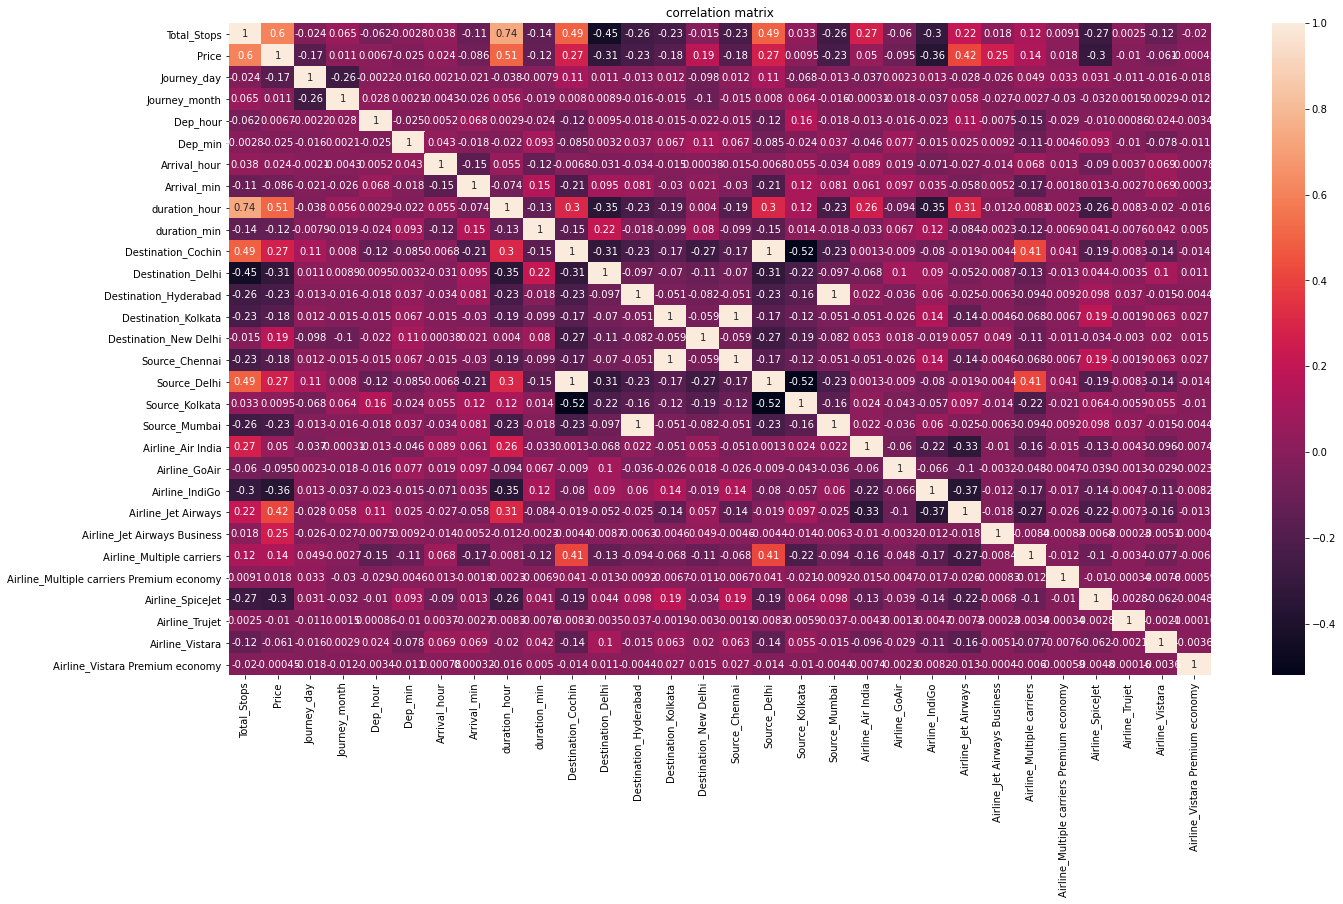

In [358]:
plt.figure(figsize=(22,12))
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

price was seen to be related to number of stops

In [359]:
#to see the correclation of target column with all attributes
cor['Price'].sort_values(ascending=False)

Price                                        1.000000
Total_Stops                                  0.603782
duration_hour                                0.509090
Airline_Jet Airways                          0.416323
Destination_Cochin                           0.270869
Source_Delhi                                 0.270869
Airline_Jet Airways Business                 0.253345
Destination_New Delhi                        0.189858
Airline_Multiple carriers                    0.139874
Airline_Air India                            0.050073
Arrival_hour                                 0.024183
Airline_Multiple carriers Premium economy    0.017658
Journey_month                                0.010681
Source_Kolkata                               0.009461
Dep_hour                                     0.006698
Airline_Vistara Premium economy             -0.000451
Airline_Trujet                              -0.010381
Dep_min                                     -0.024692
Airline_Vistara             

Price was found to be positively correlated to number of stops, duration hours and jet airways.

In [368]:
#null values 
data_train.isnull().sum()

Total_Stops                                  1
Price                                        1
Journey_day                                  1
Journey_month                                1
Dep_hour                                     1
Dep_min                                      1
Arrival_hour                                 1
Arrival_min                                  1
duration_hour                                1
duration_min                                 1
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_New Delhi                        0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiG

In [370]:
data_train.dropna(inplace=True)

Some null values were seen in few columns which were then dropped.

In [371]:
data_train.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
duration_hour                                0
duration_min                                 0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_New Delhi                        0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiG

# Model Building

In [381]:
#splitting the data
y=data_train['Price']
x=data_train.drop('Price', axis=1)

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [383]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [384]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.955992478330711

In [385]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 1218.5152069366497
mse_rfr 4436541.309084968
r2 score_rfr 0.778256560803778


# Cross validation

In [386]:
from sklearn.model_selection import cross_val_score

In [387]:
print ("cross val score for random forest regressor is:",cross_val_score(rfr,x,y,scoring='r2',cv=5).mean())

cross val score for random forest regressor is: 0.803683505303114


# Hyperparameter tuning

In [389]:
from sklearn.model_selection import RandomizedSearchCV

In [388]:
rfr=RandomForestRegressor()

In [390]:

n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]

In [391]:

params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [392]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9]}

In [393]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [394]:

rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=1, verbose=2)

In [395]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'auto'}

# Final model with best parameter

In [396]:
final_model=RandomForestRegressor(n_estimators=100,
 min_samples_split=7,
 min_samples_leaf=1,
 max_features='auto')

In [397]:
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)

0.931460622227123

In [398]:
predfinal=final_model.predict(x_test)
print('mae_final_model',mean_absolute_error(y_test,predfinal))
print('mse_final_model',mean_squared_error(y_test,predfinal))
print('r2 score_final_model',r2_score(y_test,predfinal))

mae_final_model 1174.8361946041796
mse_final_model 3986729.349277
r2 score_final_model 0.8007386800968324


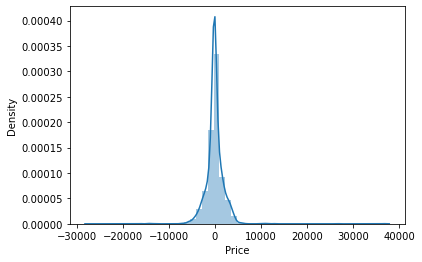

In [400]:
sb.distplot(y_test-predfinal)
plt.show()

# Saving the model

In [402]:
import joblib

In [403]:

filename='finalflightmodel.pkl'

joblib.dump(final_model,'finalflightmodel.pkl')

['finalflightmodel.pkl']